In [103]:
import pandas as pd 
import numpy as np
from xgboost import XGBClassifier
import shap
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")  

In [104]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [105]:
train = pd.read_csv('../../data/hw_tr.csv')
valid = pd.read_csv('../../data/hw_val.csv')
test = pd.read_csv('../../data/hw_te.csv')

ex1 = pd.read_csv('../../data2_2024/Kidney biopsy_External_Final_신촌.csv', encoding='cp949')

In [106]:
print(train.columns)
print(valid.columns)
print(test.columns)

print(ex1.columns)

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HW'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HW'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC_re', 'WBC_re',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HW'],
      dtype='object')
Index(['FINAL', '(실명)등록번호', '연구등록번호', '외부', '병리작성일', '서식키', '병리번호', '병리진단',


In [107]:
ex_copy = ex1[['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb',
       'bun', 'cr', 'eGFR', 'blood_dip', 'protein_dip', 'acr_urine',
       'pcr_urine', 'glu', 'glu_urine', 'esterase_urine', 'RBC', 'WBC']].copy()

In [108]:
print(train.shape)
print(valid.shape)
print(test.shape)

(6171, 24)
(411, 24)
(1646, 24)


##  column 변경

In [109]:
train.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HW']

valid.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HW']

test.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HW']

In [110]:
print(train.columns)

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'Biopsy_HW'],
      dtype='object')


### EDA

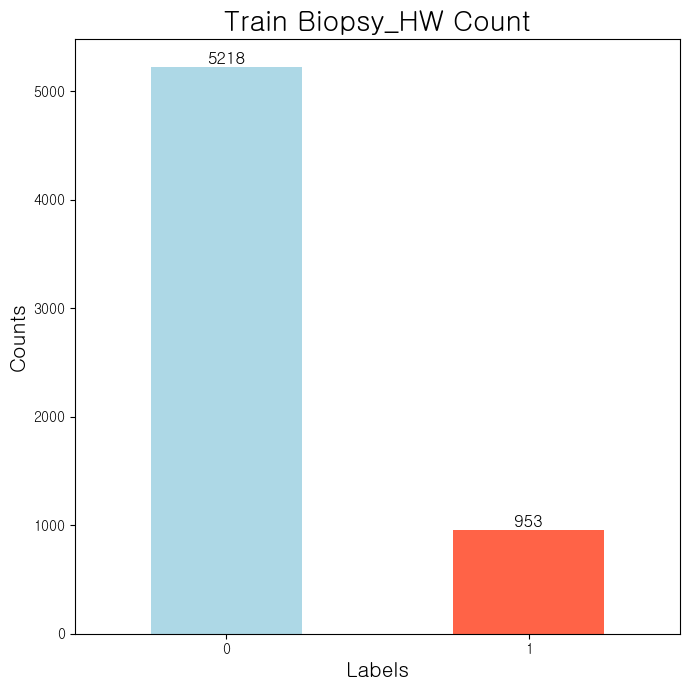

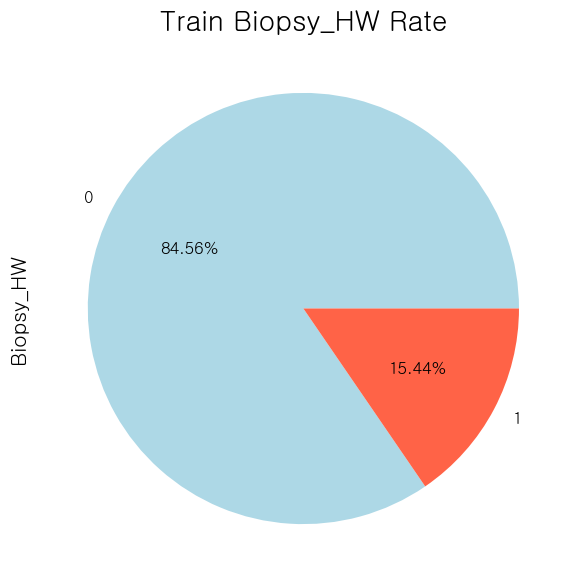

In [111]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('Train Biopsy_HW Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

# Get the value counts of 'Biopsy_HW' and plot as a bar plot
train['Biopsy_HW'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(train['Biopsy_HW'].value_counts().sort_index()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('Train Biopsy_HW Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

train['Biopsy_HW'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

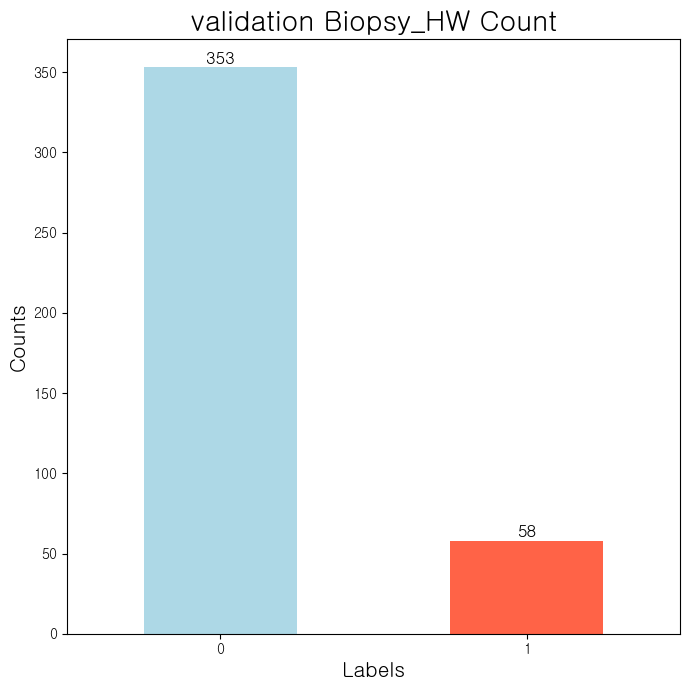

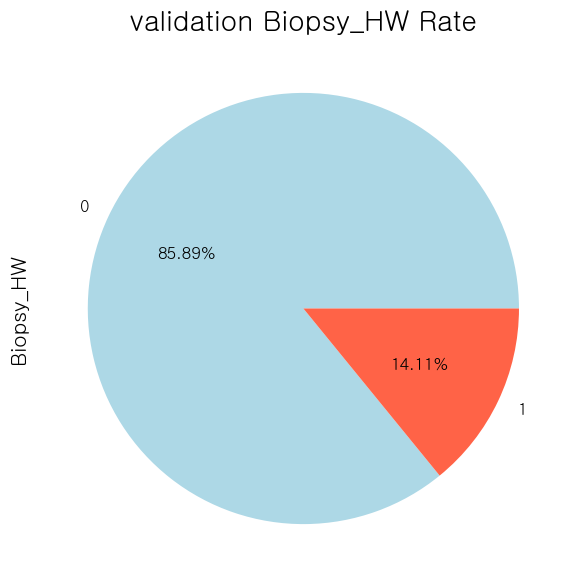

In [112]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('validation Biopsy_HW Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

valid['Biopsy_HW'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(valid['Biopsy_HW'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('validation Biopsy_HW Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

valid['Biopsy_HW'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

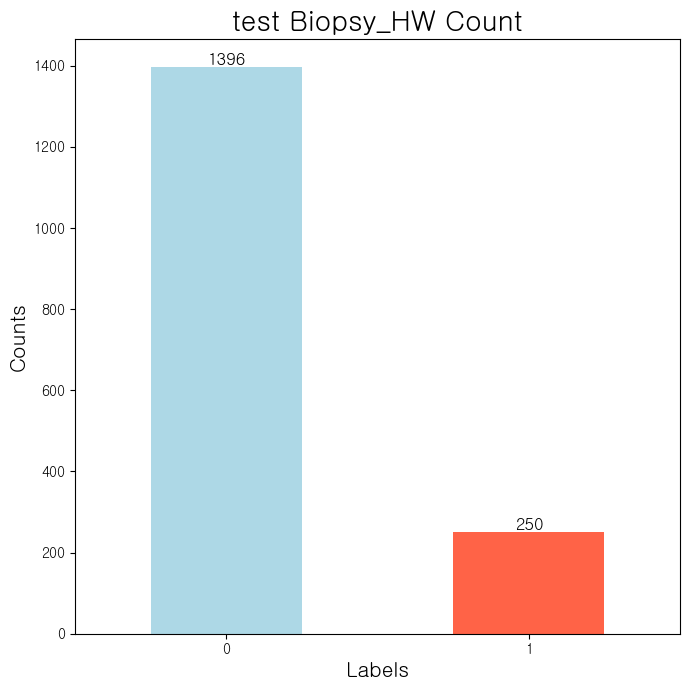

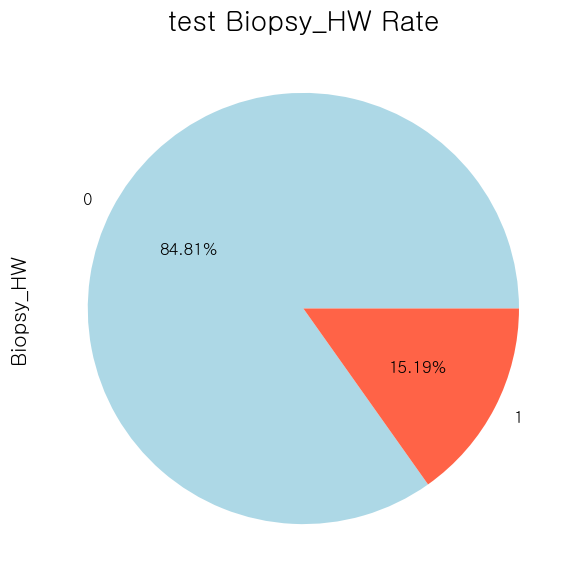

In [113]:
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed

plt.title('test Biopsy_HW Count', fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Labels', fontsize=15)

test['Biopsy_HW'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'tomato'])

# Annotate the bars with their values
for index, value in enumerate(test['Biopsy_HW'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # Keep the x-labels horizontal for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

plt.figure(figsize=(7,7))

plt.title('test Biopsy_HW Rate' , fontsize=20)

plt.ylabel('labels' , fontsize=15)

test['Biopsy_HW'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         colors = ['lightblue', 'tomato'] , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})

plt.show()

## Modeling

In [114]:
xgb = XGBClassifier(random_state = 2023, n_jobs=-1)

In [115]:
X_train = train.drop(['Biopsy_HW','RBC_binary', 'WBC_binary', 'esterase_binary','dysmorphism'], axis=1).copy()
y_train = train['Biopsy_HW'].copy()

X_valid = valid.drop(['Biopsy_HW','RBC_binary', 'WBC_binary', 'esterase_binary','dysmorphism'], axis=1).copy()
y_valid = valid['Biopsy_HW'].copy()

X_test = test.drop(['Biopsy_HW','RBC_binary', 'WBC_binary', 'esterase_binary','dysmorphism'], axis=1).copy()
y_test = test['Biopsy_HW'].copy()

In [116]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=2023, ...)

In [117]:
y_valid

0      0
1      0
2      0
3      0
4      0
      ..
406    1
407    1
408    0
409    0
410    1
Name: Biopsy_HW, Length: 411, dtype: int64

### Shap

In [118]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

In [119]:
shap.initjs()

In [120]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])


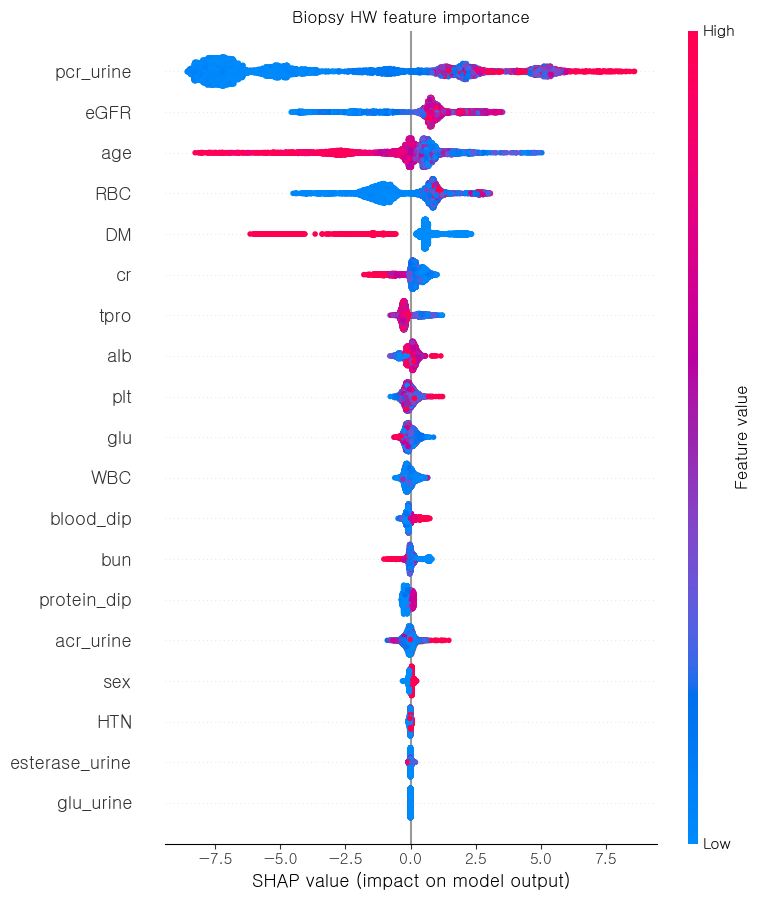

In [121]:
plt.figure(figsize=[10,10])

plt.title('Biopsy HW feature importance')
shap.summary_plot(shap_values, X_train)

plt.show()

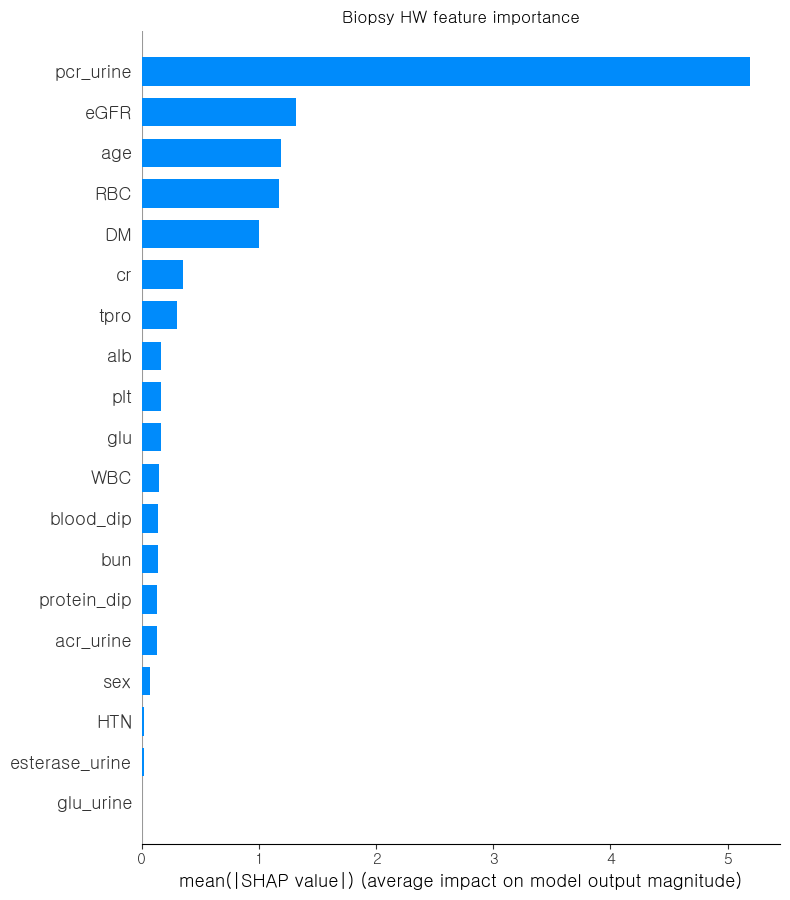

In [122]:
plt.figure(figsize=[10,10])

plt.title('Biopsy HW feature importance')
shap.summary_plot(shap_values, X_train, plot_type="bar")

plt.show()

### Train set performance

In [123]:
train_pred = xgb.predict(X_train)
train_pred_prob = xgb.predict_proba(X_train)

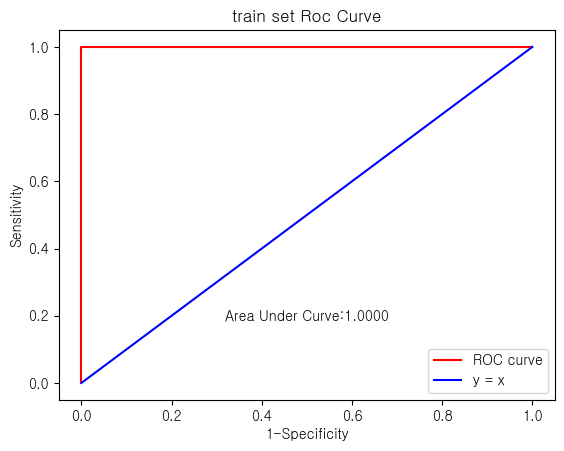

In [124]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_train), train_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_train), train_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [125]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5218
           1       1.00      1.00      1.00       953

    accuracy                           1.00      6171
   macro avg       1.00      1.00      1.00      6171
weighted avg       1.00      1.00      1.00      6171



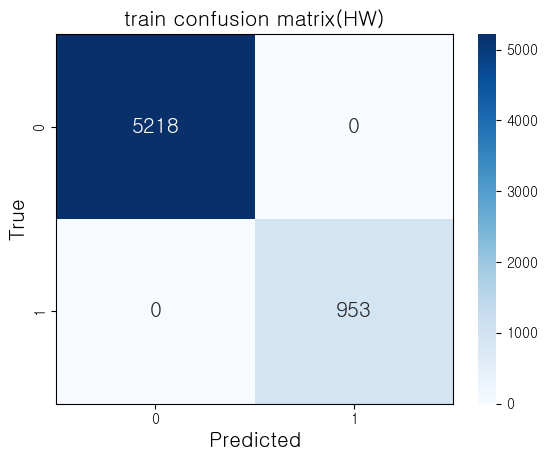

In [126]:
cm = confusion_matrix(y_train, train_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('train confusion matrix(HW)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### valid

In [127]:
pred = xgb.predict(X_valid)
print(pd.DataFrame(pred).head())

pred_prob = xgb.predict_proba(X_valid)
print(pd.DataFrame(pred_prob[:,1]).head())

   0
0  0
1  0
2  0
3  0
4  0
          0
0  0.000102
1  0.000059
2  0.000012
3  0.066007
4  0.000113


In [128]:
pred_prob.shape

(411, 2)

In [129]:
y_valid

0      0
1      0
2      0
3      0
4      0
      ..
406    1
407    1
408    0
409    0
410    1
Name: Biopsy_HW, Length: 411, dtype: int64

In [130]:
accuracy = accuracy_score(y_valid, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.03%


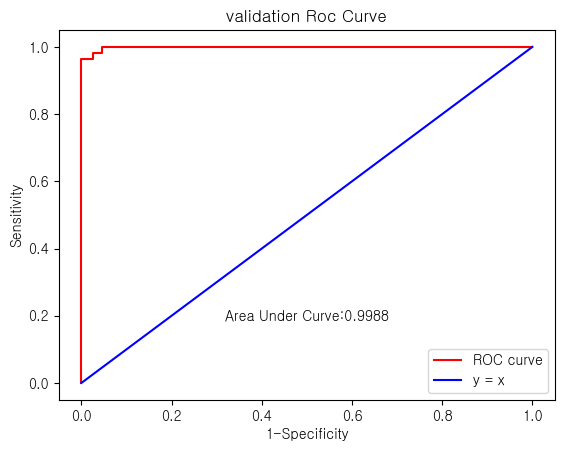

In [131]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_valid), pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_valid), pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('validation Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [132]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       353
           1       0.97      0.97      0.97        58

    accuracy                           0.99       411
   macro avg       0.98      0.98      0.98       411
weighted avg       0.99      0.99      0.99       411



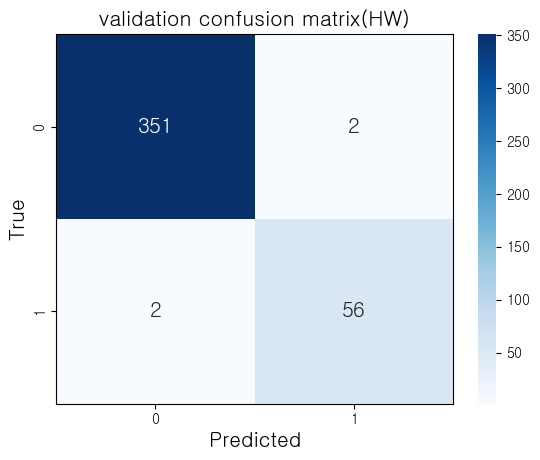

In [133]:
cm = confusion_matrix(y_valid, pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('validation confusion matrix(HW)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### test

In [134]:
test_pred = xgb.predict(X_test)
test_pred_prob = xgb.predict_proba(X_test)

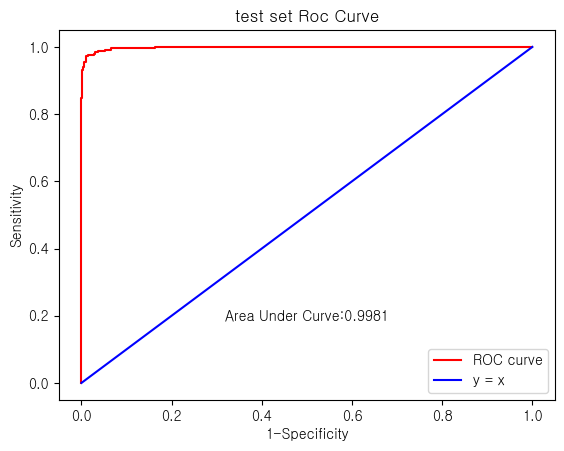

In [135]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(np.array(y_test), test_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(y_test), test_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [136]:
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.72%


In [137]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1396
           1       0.98      0.94      0.96       250

    accuracy                           0.99      1646
   macro avg       0.98      0.97      0.97      1646
weighted avg       0.99      0.99      0.99      1646



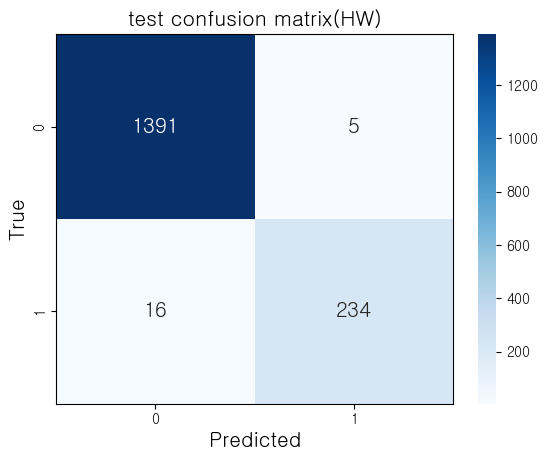

In [138]:
cm = confusion_matrix(y_test, test_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('test confusion matrix(HW)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

### 신촌 데이터셋 보기

In [139]:
ex_pred = xgb.predict(ex_copy)
ex_pred_prob = xgb.predict_proba(ex_copy)

In [140]:
ex1['Answer'].value_counts()

1    587
0    173
Name: Answer, dtype: int64

In [141]:
pd.Series(ex_pred).value_counts()

0    416
1    344
dtype: int64

In [142]:
ex1['answer1'] = ex1['pcr_urine'].apply(lambda x: 1 if 1 <= x else 0 )

In [143]:
ex1[['answer1', 'pcr_urine']]

,answer1,pcr_urine
0,1,3.31
1,1,1.17
2,1,1.55
3,1,1.55
4,1,7.55
...,...,...
755,0,0.07
756,1,497.90
757,1,497.90
758,0,0.06


In [144]:
print(ex1.answer1.value_counts())
label_ratios = ex1['answer1'].value_counts() / len(ex1['answer1'])
print(label_ratios)

1    480
0    280
Name: answer1, dtype: int64
1    0.631579
0    0.368421
Name: answer1, dtype: float64


In [145]:
print(ex_pred)
print(ex_pred_prob)

[0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0 1 0 1 0 0 

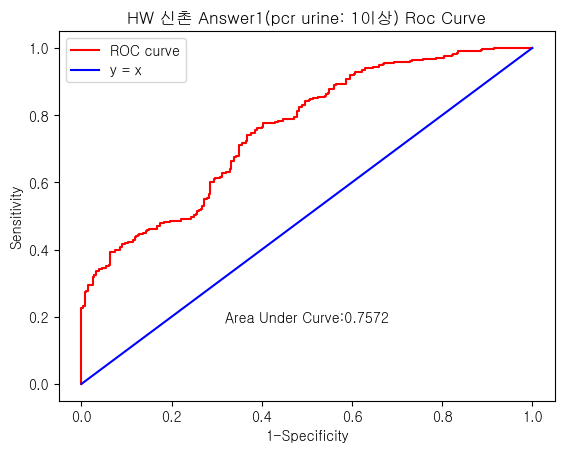

In [146]:
# roc curve, auc 신촌 set
fpr, tpr, thresholds = roc_curve(np.array(ex1['answer1']), ex_pred_prob[:,1])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(np.array(ex1['answer1']), ex_pred_prob[:,1])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('HW 신촌 Answer1(pcr urine: 1이상) Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [147]:
print(classification_report(ex1['answer1'], ex_pred))

              precision    recall  f1-score   support

           0       0.49      0.72      0.58       280
           1       0.77      0.55      0.65       480

    accuracy                           0.62       760
   macro avg       0.63      0.64      0.61       760
weighted avg       0.67      0.62      0.62       760



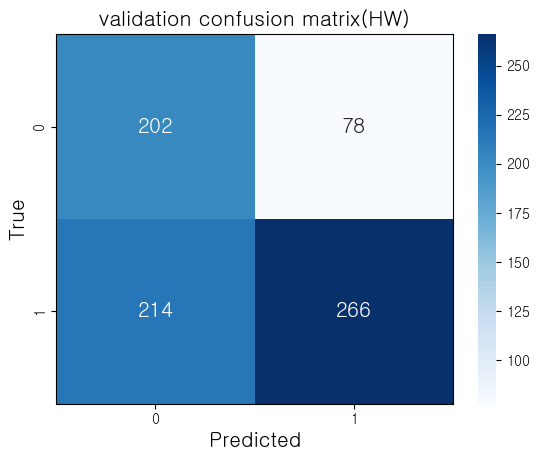

In [148]:
cm = confusion_matrix(ex1['answer1'], ex_pred)

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('validation confusion matrix(HW)', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()